# Flight Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
d = pd.read_excel('C:/Users/Aayushi Lashkari/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [4]:
df = pd.DataFrame(d)

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Target variable = Price

Rest of the features are in object format

Number of rows = 10683

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

1 null values in total stops and route

In [8]:
df['Route'] = np.where(df['Route'].isnull(),df['Route'].mode(),df['Route'])

In [9]:
df['Total_Stops'] = np.where(df['Total_Stops'].isnull(),df['Total_Stops'].mode(),df['Total_Stops'])

Replaced null values with mode

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
for i in df.columns:
    if(df[i].dtypes=='object'):
        print(i)
        print(df[i].value_counts())
        print('................................')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
................................
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     2

In additional Info 8348 columns are of NO info

In [13]:
pre_no_info = (8348*100)/10683

In [14]:
pre_no_info    #(approx 78% shows no info)

78.14284377047646

Date of journey is given in the format of dd/mm/yyyy

Extracting day , month and year

In [16]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [17]:
df['Date_of_Journey_day'] =df['Date_of_Journey'].dt.day


In [18]:
df['Date_of_Journey_month'] = df['Date_of_Journey'].dt.month

In [19]:
df['Date_of_Journey_year'] = df['Date_of_Journey'].dt.year

In [22]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
df['Dep_Time']  = pd.to_datetime(df['Dep_Time'])

In [24]:
df['Dep_Time_hour'] = df['Dep_Time'].dt.hour

In [26]:
df['Dep_Time_min'] = df['Dep_Time'].dt.minute

In [28]:
df.drop('Dep_Time',axis=1,inplace=True)

Dropped dept time because we have seperated houe and minutes

In [29]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [30]:
df['Arrival_Time_hour'] = df['Arrival_Time'].dt.hour

In [32]:
df['Arrival_Time_minute'] = df['Arrival_Time'].dt.minute

In [33]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [38]:
duration_list = list(df["Duration"])

for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:         #if only hur or min is there
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   



df["Duration_hour"] = duration_hours
df["Duration_min"] = duration_mins

In [39]:
df.drop('Duration',axis=1,inplace=True)

Separeated hours and minutes from duration 

In [45]:
categorical= [i for i in df if df[i].dtypes=='O']

In [46]:
categorical

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

seperating categorical features

# Exploratory Data Analysis

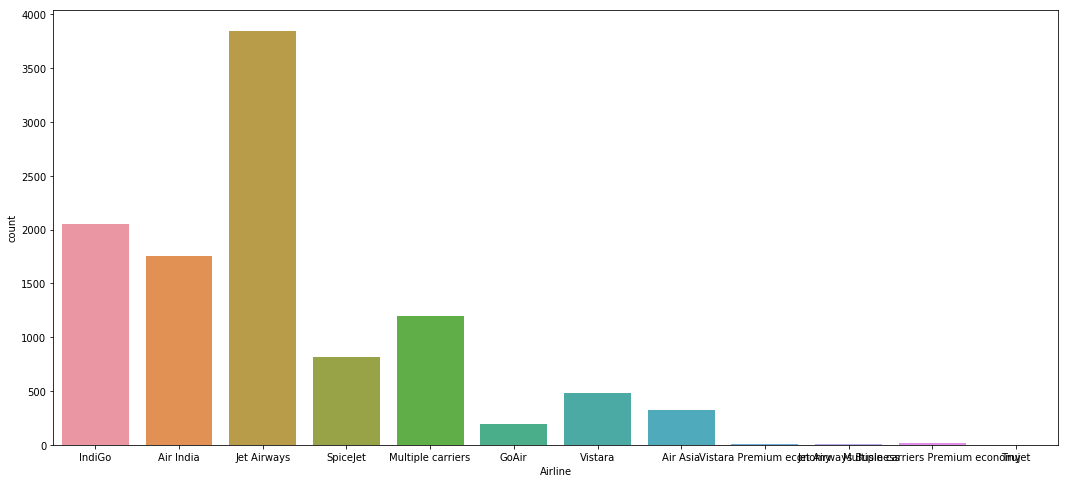

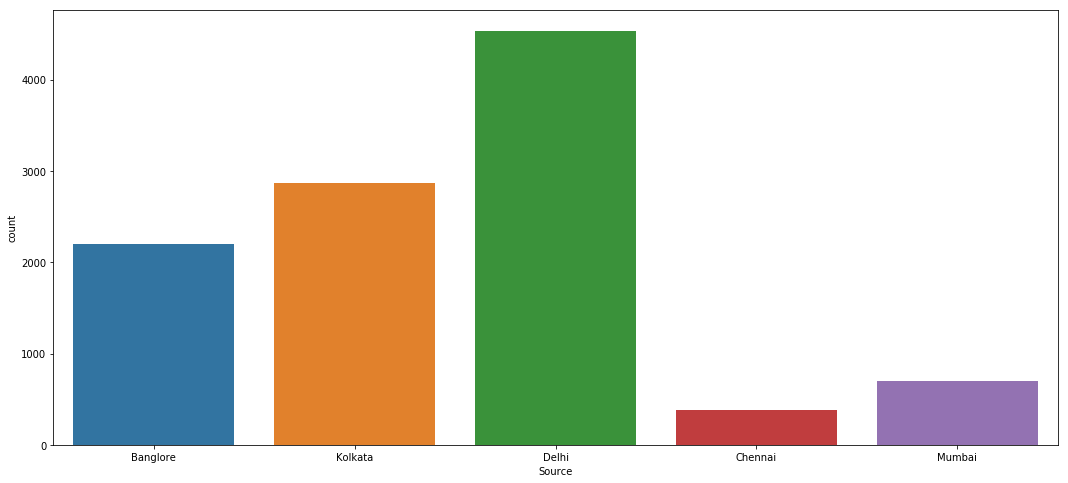

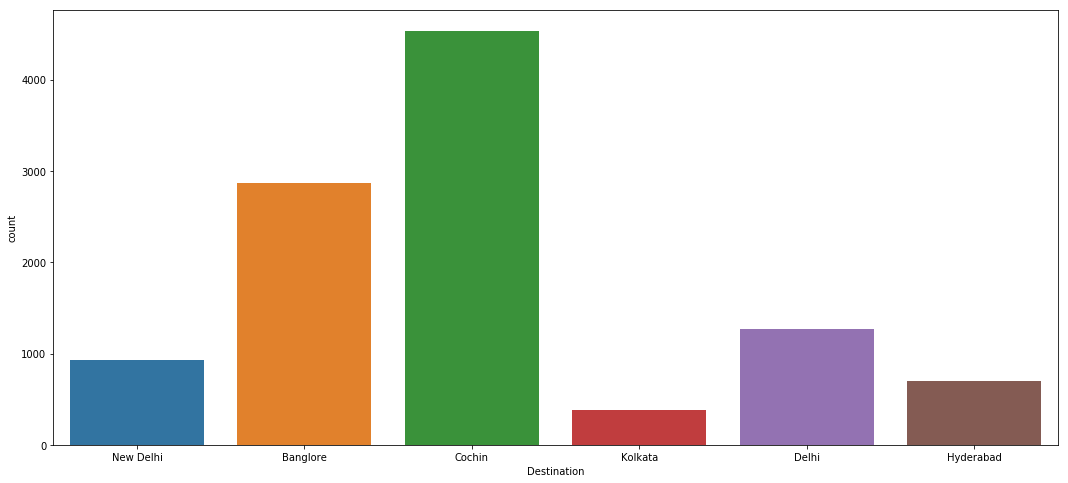

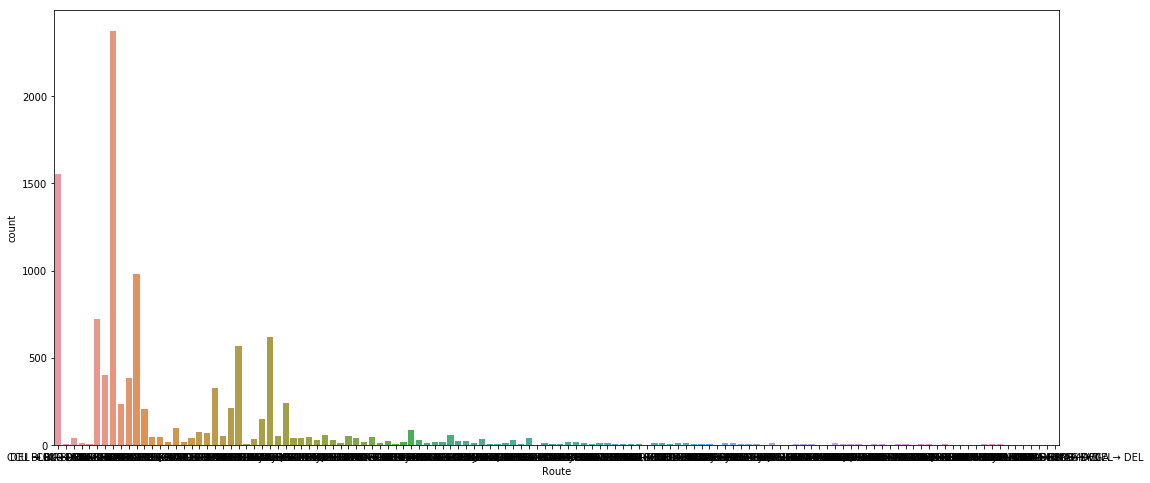

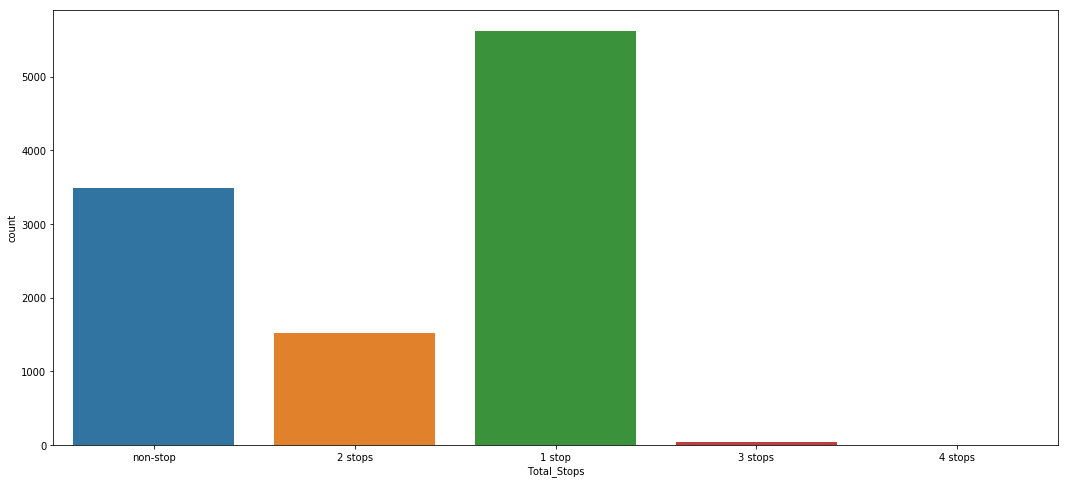

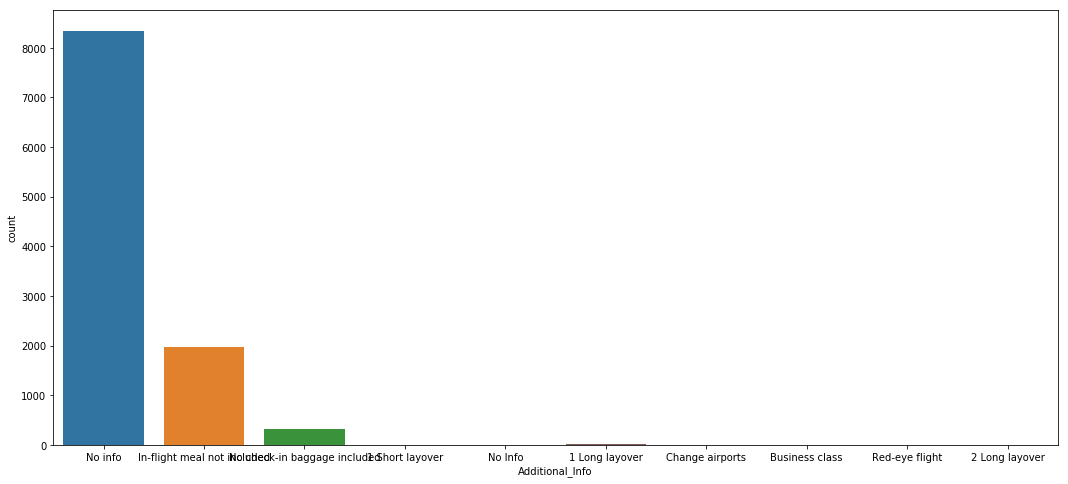

In [48]:
for i in categorical:
    plt.figure(figsize=(18,8))
    sns.countplot(df[i])
    plt.show()

Most of the flights are from jet airways

most frequent source = delhi

most freuqent destination = cochin

Most flights takes one stop

<Figure size 1296x576 with 0 Axes>

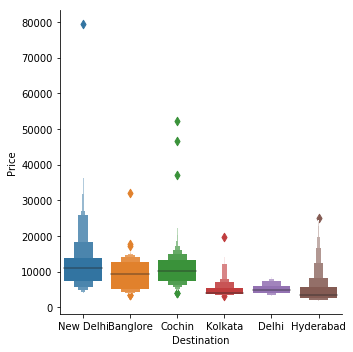

In [54]:
sns.catplot(x='Destination',y='Price',kind='boxen',data=df)

destination of Most Expensive flights: New Delhi then cochin , bangalore , hyderabad , kolkata and Delhi

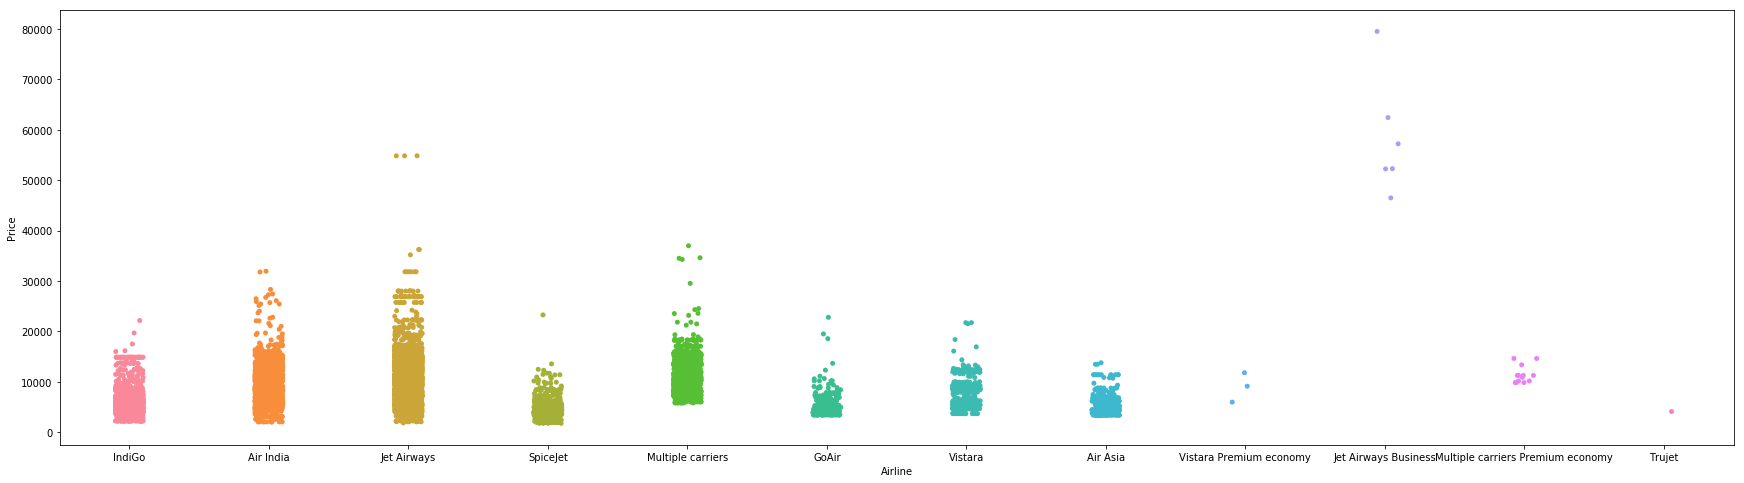

In [67]:
plt.figure(figsize=(30,8))
sns.stripplot(x='Airline',y='Price',data=df)

Jet Airways Business are the most expensive flights



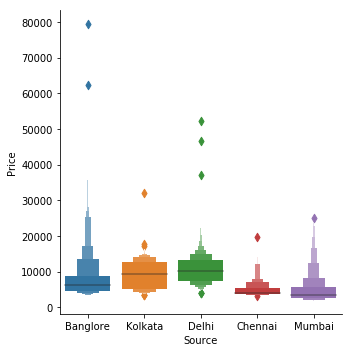

In [68]:
sns.catplot(x='Source',y='Price',kind='boxen',data=df)

Most expensive flights is from bangalore then Delhi , Kolkata , mumbai and chennai

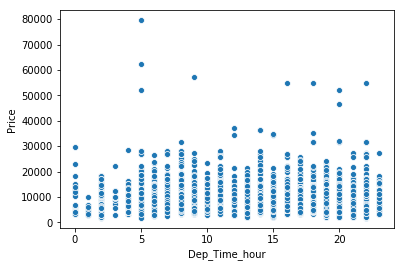

In [70]:
sns.scatterplot(x='Dep_Time_hour',y='Price',data=df)

Dep time of 5:00 is most expensive flights
    
After 3:00 noon prices are moderate
    
Between 10:00 to 3:00 prices are comparatively less

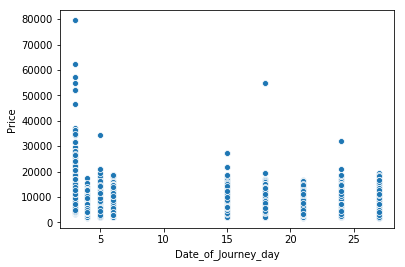

In [71]:
sns.scatterplot(x='Date_of_Journey_day',y='Price',data=df)

In the first week of the month prices are high and seems no data for middle of the month

And in ths ending of the month prices are moderate to less

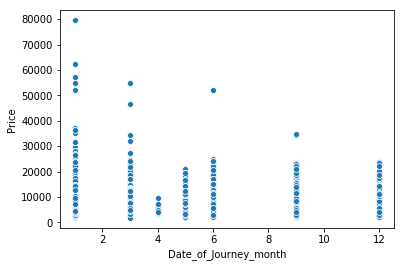

In [72]:
sns.scatterplot(x='Date_of_Journey_month',y='Price',data=df)

In first month(January) prices are high

And in Fourth month(april) prices are less

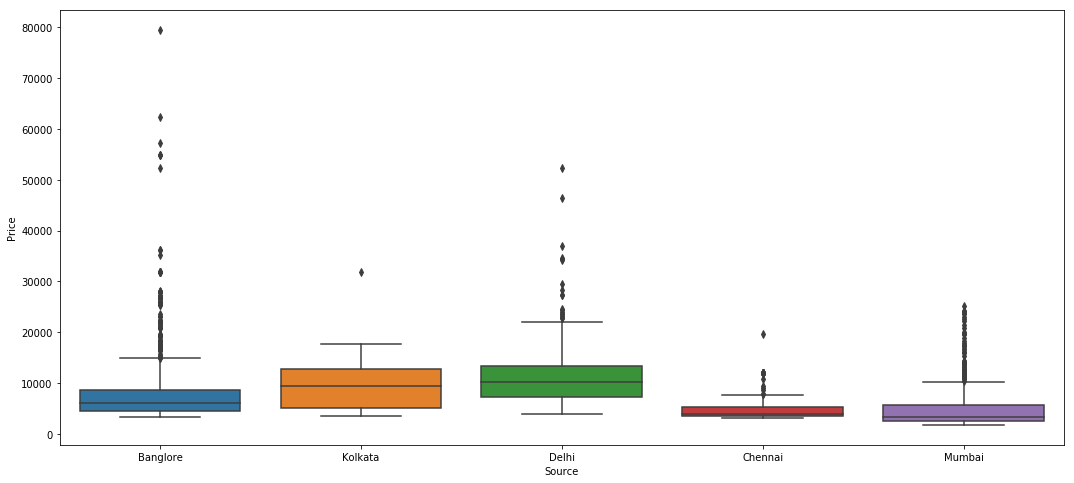

In [74]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Source',y='Price',data=df)

Boxplot is showing outliers in the prices of source = banglore most then In delhi

Therefore the flights price from bangalore are high

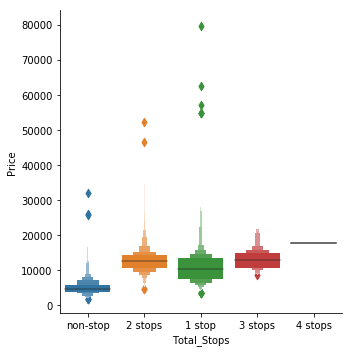

In [75]:
sns.catplot(x='Total_Stops',y='Price',kind='boxen',data=df)

Prices of flight with 1 stop are most expensive

And with 3 stops  least expensive

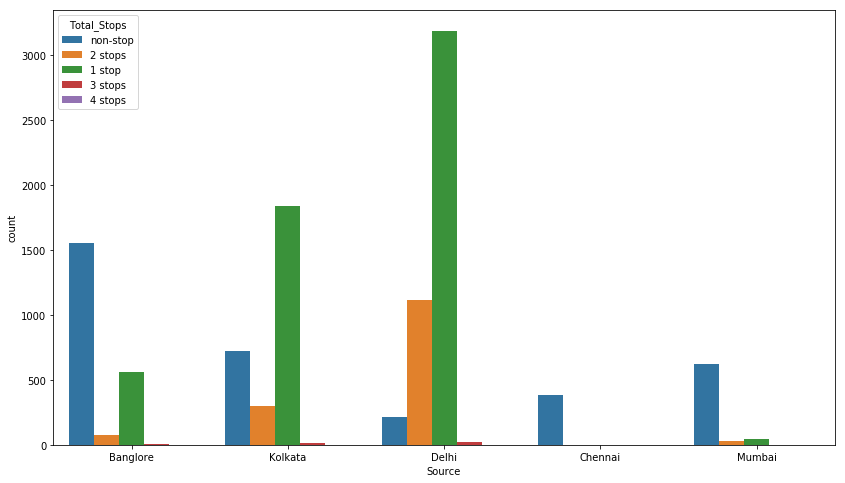

In [79]:
plt.figure(figsize=(14,8))
sns.countplot(x='Source',hue='Total_Stops',data=df)



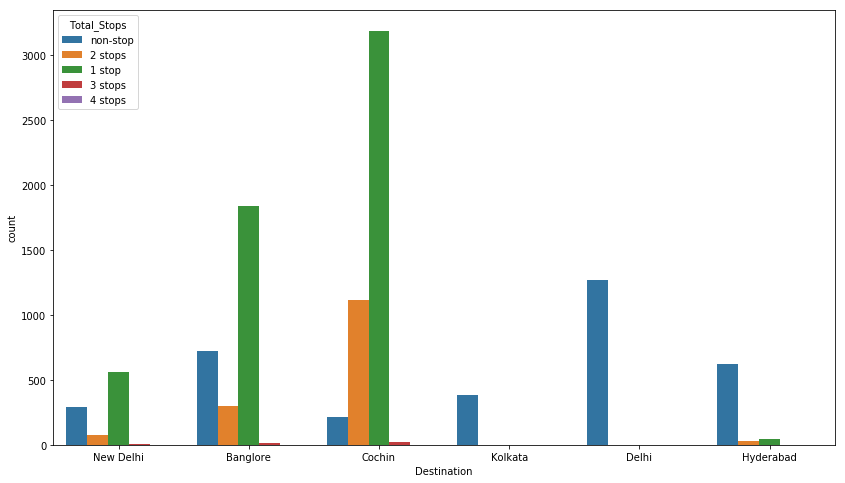

In [80]:
plt.figure(figsize=(14,8))
sns.countplot(x='Destination',hue='Total_Stops',data=df)

From Delhi most of the flights take 1 stop

From chennai only non stop flights are there

From bangalore non stop flights are more

Most of the Flights arrive to cochin takes 1 stop

To kolkata and delhi only non stop flights are there

conclusion:
    
from chennai to kolkata or chennai to delhi only non stop flights are there

From delhi to cochin most of the flights takes one stop

In [82]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

Dropped additional info because 80% rows says no info

Route has most of the unique values

In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
ord_en = OrdinalEncoder()

In [86]:
for i in df.columns:
    if(df[i].dtypes=='O'):
        df[i] = ord_en.fit_transform(df[i].values.reshape(-1,1))

No need for checking outliers or skewness as all the independent variables are either categorical or temporal

In [87]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,3.0,0.0,5.0,4.0,3897,24,3,2019,22,20,1,10,2,50
1,1.0,3.0,0.0,1.0,7662,5,1,2019,5,50,13,15,7,25
2,4.0,2.0,1.0,1.0,13882,6,9,2019,9,25,4,25,19,0
3,3.0,3.0,0.0,0.0,6218,5,12,2019,18,5,23,30,5,25
4,3.0,0.0,5.0,0.0,13302,3,1,2019,16,50,21,35,4,45


In [88]:
df['Date_of_Journey_year'].value_counts()

2019    10683
Name: Date_of_Journey_year, dtype: int64

dropping date of journey year because of same year throught the year

In [89]:
df.drop('Date_of_Journey_year',axis=1,inplace=True)

In [90]:
df.shape

(10683, 13)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [92]:
stnd_sc = StandardScaler()

In [93]:
df['Price'] = stnd_sc.fit_transform(df['Price'].values.reshape(-1,1))

Scaling of target variable

In [95]:
min_sc = MinMaxScaler()

In [96]:
df_n =  pd.DataFrame(min_sc.fit_transform(df),columns=df.columns)

Dataset after scaling

In [97]:
df_n.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,0.272727,0.00,1.0,1.00,0.027497,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.75,0.0,0.25,0.075920,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.363636,0.50,0.2,0.25,0.155917,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.00,0.057348,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.272727,0.00,1.0,0.00,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

spitting the data

In [99]:
x = df_n.drop('Price',axis=1)

In [100]:
y= df_n['Price']

Finding best random state

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [102]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(mean_squared_error(pred_test,y_test)*100,1)==round(mean_squared_error(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test mse',mean_squared_error(pred_test,y_test))
        print('train mse',mean_squared_error(pred_train,y_train))

random state 1
test mse 0.0019862049732735083
train mse 0.002098332871919668
random state 2
test mse 0.001965259399699223
train mse 0.002108886728850768
random state 3
test mse 0.0019149765940582315
train mse 0.002134667664799025
random state 4
test mse 0.0018596451859440068
train mse 0.0021599601924000332
random state 5
test mse 0.002251809258907685
train mse 0.0019674178293261203
random state 6
test mse 0.00205154993556287
train mse 0.002065440521809239
random state 7
test mse 0.0019493173327965185
train mse 0.0021155676496899486
random state 8
test mse 0.00202254873738851
train mse 0.0020800867602385835
random state 9
test mse 0.001843689793007093
train mse 0.0021677916051496405
random state 10
test mse 0.0020810199356542693
train mse 0.002050870130669353
random state 11
test mse 0.002063679229306811
train mse 0.002059688684606709
random state 12
test mse 0.002243937058422464
train mse 0.001970863904763128
random state 13
test mse 0.001949030085520401
train mse 0.002116848950120462


Taking 4 as the best random state

In [103]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [106]:
alg_l = [SVR,DecisionTreeRegressor,KNeighborsRegressor,LinearRegression]

In [105]:
from sklearn.model_selection import cross_val_score

Trying Different Algorithms

In [112]:
for a in alg_l:
    x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=.33,random_state=4)
    obj_ = a()
    obj_.fit(x_train,y_train)
    p=obj_.predict(x_test)
    print(a)
    print("MSE",mean_squared_error(p,y_test))
    print("RMSE",np.sqrt(mean_squared_error(p,y_test)))
    print('........................')

<class 'sklearn.svm._classes.SVR'>
MSE 0.0026824982602069143
RMSE 0.051792839854625794
........................
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE 0.0012858612424523526
RMSE 0.035858907435285206
........................
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
MSE 0.001157263651645562
RMSE 0.03401857803679575
........................
<class 'sklearn.linear_model._base.LinearRegression'>
MSE 0.001957825502252784
RMSE 0.0442473219783162
........................


Kneighors are giving least MSE and RMSE

# Ensemble Technique

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
list_en = [RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor]

In [117]:
for i in list_en:
    ob = i(n_estimators=100)
    ob.fit(x_train,y_train)
    pr = ob.predict(x_test)
    cross_val = cross_val_score(ob,x,y,cv=4)
    print(i)
    print('cross score',cross_val.mean())
    print('r2 score',r2_score(y_test,pr))
    print('----------------------------------')

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
cross score 0.7824933103790987
r2 score 0.794095658745473
----------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
cross score 0.3157173529685349
r2 score 0.10550660622507657
----------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
cross score 0.7699341353280124
r2 score 0.7741328366812081
----------------------------------


Gradient boost is giving least difference between r2 and cross val score 

# Hyper Parametric Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters_gb = {
    'n_estimators':[100,300,500],
    'max_depth':[4,5,6],
    'min_samples_split':[100,150]
}

In [120]:
grad_reg = GradientBoostingRegressor()

In [121]:
grid_gboost = GridSearchCV(grad_reg,parameters_gb,cv=5)

In [122]:
grid_gboost.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 300, 500]})

In [123]:
print(grid_gboost.best_params_)
print(grid_gboost.best_score_)

{'max_depth': 6, 'min_samples_split': 100, 'n_estimators': 300}
0.8275389598186624


# Best score of grid search is 0.82

In [125]:
best_mod_gboost = GradientBoostingRegressor(n_estimators=300,min_samples_split=100,max_depth=6)

In [126]:
best_mod_gboost.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, min_samples_split=100, n_estimators=300)

In [127]:
pred_final = best_mod_gboost.predict(x_test)

In [129]:
print('r2score of final model',r2_score(pred_final,y_test))
print('MSE of final Model',mean_squared_error(pred_final,y_test))
print('RMSE of final Model',np.sqrt(mean_squared_error(pred_final,y_test)))

r2score of final model 0.8073104252347149
MSE of final Model 0.0005696392077102113
RMSE of final Model 0.02386711561354265


# saving the best model

In [130]:
import pickle 

In [131]:
flight_pred = 'flight.pkl'
pickle.dump(best_mod_gboost,open(flight_pred,'wb'))

# Conclusion

In [132]:
original_res = np.array(y_test)
pred_res = np.array(best_mod_gboost.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0.000592,0.000592
1,0.130824,0.130824
2,0.147322,0.147322
3,0.146583,0.146583
4,0.134762,0.134762
...,...,...
3521,0.025176,0.025176
3522,0.141194,0.141194
3523,0.123803,0.123803
3524,0.294634,0.294634


# Importing Test Data

In [133]:
df_test = pd.read_excel('C:/Users/Aayushi Lashkari/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')

In [134]:
df_test = pd.DataFrame(df_test)

In [135]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [136]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values in the test data

# Data Preprocessing

In [138]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])

In [139]:
df_test['Date_of_Journey_day'] = df_test['Date_of_Journey'].dt.day

In [140]:
df_test['Date_of_Journey_month'] = df_test['Date_of_Journey'].dt.month

In [141]:
df_test.drop('Date_of_Journey',axis=1,inplace=True)

dropping date of journey as month and day are extracted and year is same 

In [143]:
df_test['Dep_Time']  = pd.to_datetime(df_test['Dep_Time'])

df_test['Dep_Time_hour'] = df_test['Dep_Time'].dt.hour

df_test['Dep_Time_minute'] = df_test['Dep_Time'].dt.minute

Similarly in dep_time fetched hour and month 

And now dropping dep_time

In [144]:
df_test.drop('Dep_Time',axis=1,inplace=True)

In [145]:
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])

df_test['Arrival_Time_hour'] = df_test['Arrival_Time'].dt.hour

df_test['Arrival_Time_min'] = df_test['Arrival_Time'].dt.minute



In [148]:
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

In [149]:
df_test.drop('Duration',axis=1,inplace=True)

Extracted hour and minute from arrival time and with duration also



In [150]:
df_test.drop('Arrival_Time',axis=1,inplace=True)

In [152]:
for i in df_test.columns:
    if(df_test[i].dtypes=='object'):
        print(i)
        print(df_test[i].value_counts())
        print('................................')

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
................................
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
................................
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
................................
Route
DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR     

80% of Additional info showing same value

 And in route many are unique values
    
Therefore dropping bothe the columns

In [153]:
df_test.drop(['Additional_Info','Route'],axis=1,inplace=True)

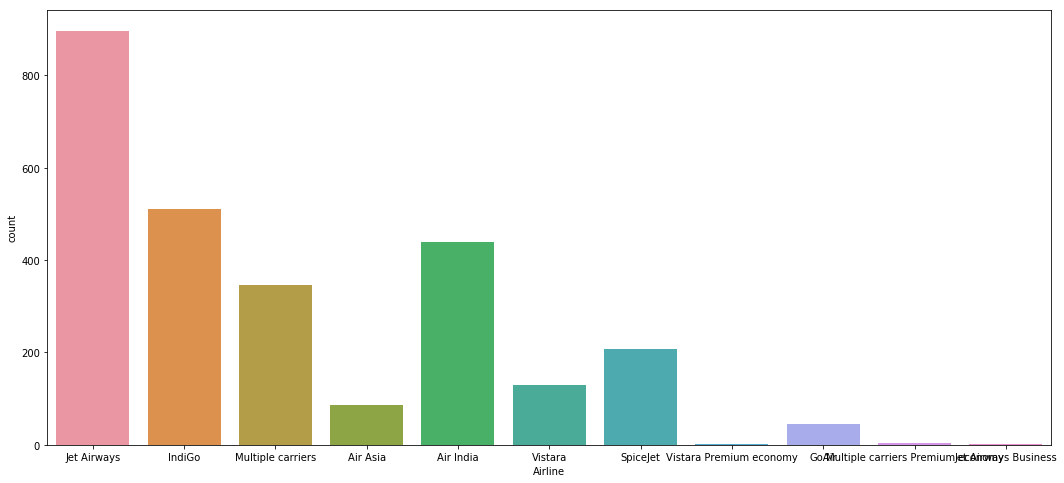

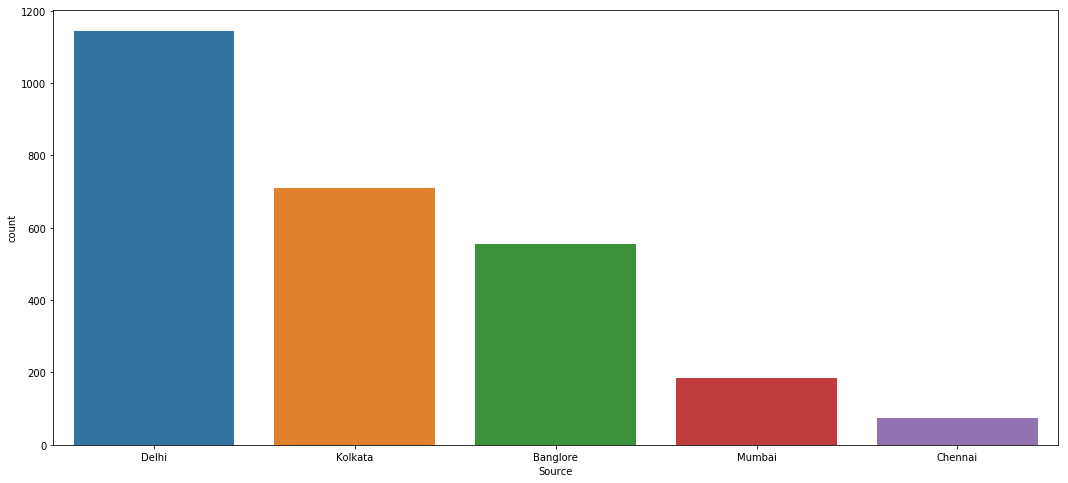

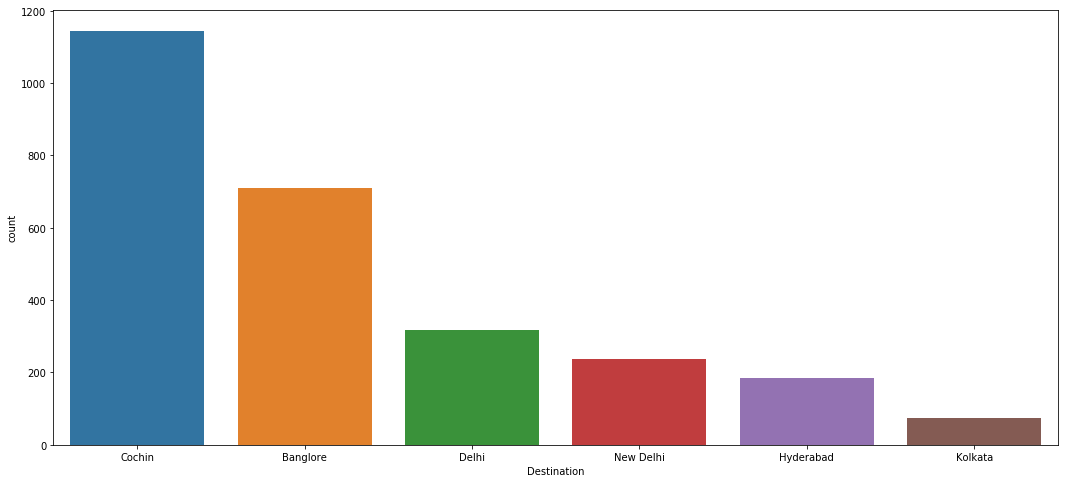

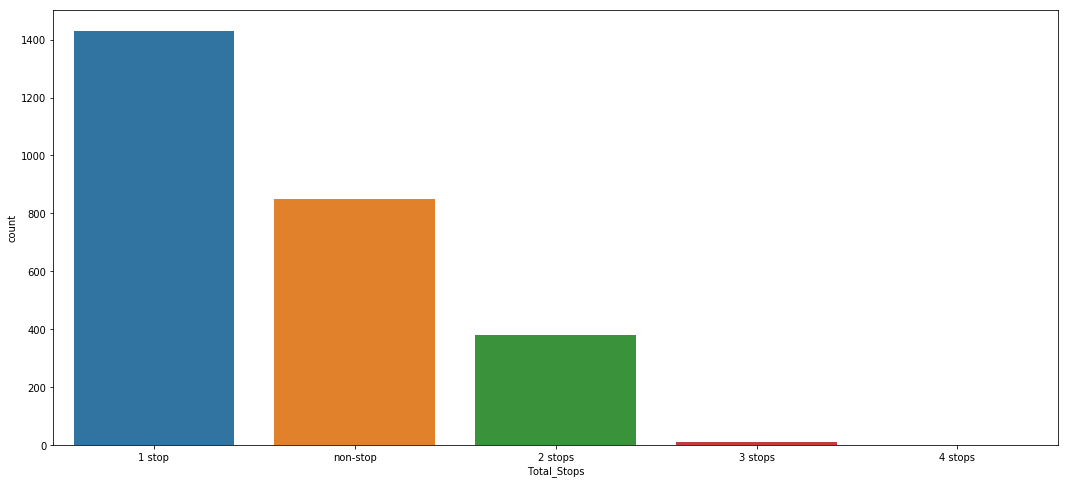

In [154]:
for i in df_test:
    if(df_test[i].dtypes=='O'):
        plt.figure(figsize=(18,8))
        sns.countplot(df_test[i])
        plt.show()

Jet airways has highest flights

Most of the flights dep_location is delhi

Arrival location of most of the flights is cochin

Most of the flights takes one stop

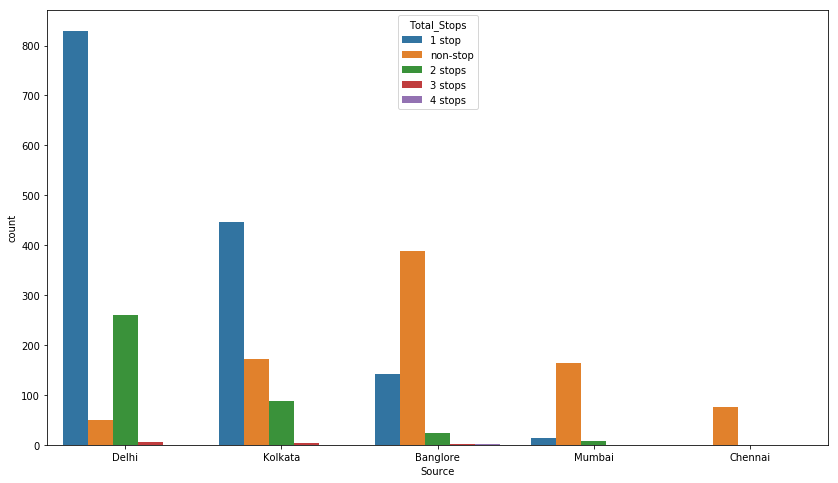

In [157]:
plt.figure(figsize=(14,8))
sns.countplot(x='Source',hue='Total_Stops',data=df_test)

From Delhi maximum flights takes one stop

From bangalore maximum flights are non stop

From chennai non stop flights are there

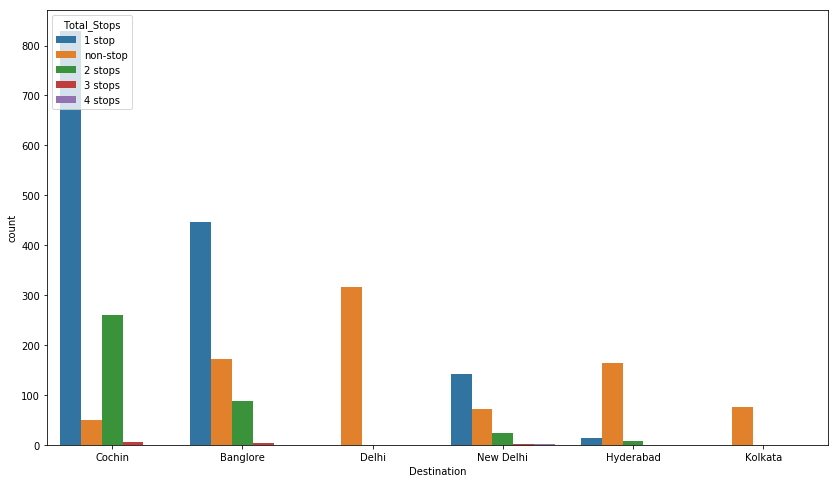

In [158]:
plt.figure(figsize=(14,8))
sns.countplot(x='Destination',hue='Total_Stops',data=df_test)

maximum flights arrives at cochin takes one stop:
    
In delhi and Kolkata only non stop flights arrive

In [159]:
for i in df_test.columns:
    if(df_test[i].dtypes=='O'):
        df_test[i] = ord_en.fit_transform(df_test[i].values.reshape(-1,1))

Encoding categorical features

In [160]:
df_test_new =  pd.DataFrame(min_sc.fit_transform(df_test),columns=df_test.columns)

Test data after scaling

In [161]:
df_test_new.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0.4,0.50,0.2,0.0,0.125000,0.454545,0.739130,0.545455,0.173913,0.454545,0.250,1.000000
1,0.3,0.75,0.0,0.0,0.083333,1.000000,0.260870,0.363636,0.434783,0.363636,0.100,0.000000
2,0.4,0.50,0.2,0.0,0.750000,0.363636,0.826087,0.272727,0.826087,0.000000,0.575,0.818182
3,0.6,0.50,0.2,0.0,0.750000,0.363636,0.347826,0.000000,0.913043,0.000000,0.325,0.000000
4,0.0,0.00,0.4,1.0,0.875000,0.454545,1.000000,1.000000,0.086957,0.818182,0.050,0.909091


Loading the saved model to predict the price for test data

In [162]:
model_load = pickle.load(open(flight_pred,'rb'))
pred_test = model_load.predict(df_test_new)

In [163]:
pred_test=pd.DataFrame(pred_test)

In [164]:
pred_test # showing predicted price for test data

,0
0,0.120701
1,0.042144
2,0.153067
3,0.102730
4,0.029949
...,...
2666,0.110274
2667,0.041457
2668,0.189620
2669,0.128330
